In [2]:
# 1. Carga de datos y preprocesado
import pandas as pd

df = pd.read_csv("C:/Users/andre/Documents/IRONHACK/Machine-Learning-Group-Project/Data/student-por.csv", sep=";")

# Codificación de variables categóricas
df_encoded = pd.get_dummies(df, drop_first=True)

# Eliminar G1 y G2 como regresores
X = df_encoded.drop(columns=["G1", "G2", "G3"])
y = df_encoded["G3"]


🔹 ¿Qué haces?

Cargas el CSV y codificas las variables de texto en variables numéricas (0/1).

Separas:

X: todas las variables predictoras (salvo G1, G2, y G3)

y: la variable objetivo: la nota final G3

In [3]:
# 2. Separación de datos

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

🔹 ¿Para qué?

Para entrenar el modelo con una parte (80%) y validarlo con otra (20%), evitando sobreajuste.

In [4]:
# 3. Modelo 1 — Regresión lineal

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Linear Regression — R²: {r2_lr:.3f} | RMSE: {rmse_lr:.2f}")

Linear Regression — R²: 0.160 | RMSE: 2.86


🔹 ¿Qué modelo es este?

El modelo más básico: una línea que intenta aproximarse a la relación entre variables y la nota.

🔹 ¿Qué obtuviste?

R² = 0.170 | RMSE = 3.76

| Métrica       | Qué significa                                                     | Interpretación             |
| ------------- | ----------------------------------------------------------------- | -------------------------- |
| `R² = 0.17`   | Solo el **17%** de la variabilidad de G3 se explica por el modelo | Es bajo, pero algo aprende |
| `RMSE = 3.76` | El modelo **se equivoca de media en 3.76 puntos sobre 20**        | Es un error moderado       |


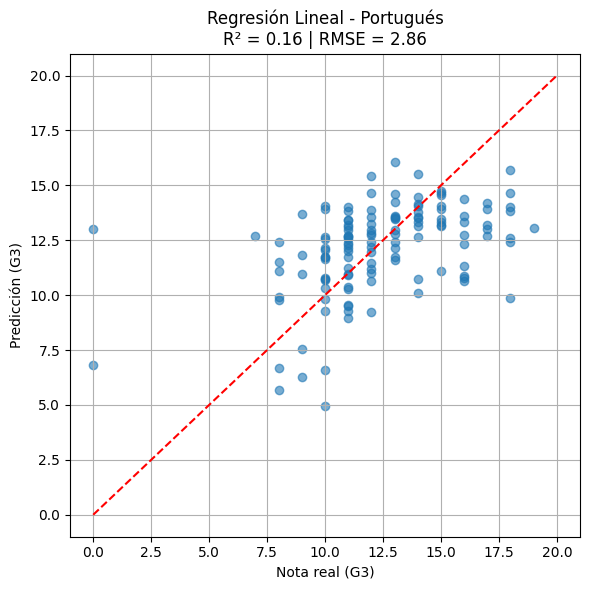

In [5]:
# 4. Visualización — Regresión lineal

import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot([0,20], [0,20], color='red', linestyle='--')
plt.xlabel("Nota real (G3)")
plt.ylabel("Predicción (G3)")
plt.title(f"Regresión Lineal - Portugués\nR² = {r2_lr:.2f} | RMSE = {rmse_lr:.2f}")
plt.grid(True)
plt.tight_layout()
plt.show()

Muestra cómo se distribuyen los valores predichos vs reales.
Si todos cayeran en la línea roja, sería perfecto.
Ves dispersión → el modelo predice con bastante error.

In [6]:
#5. Modelo 2 — Random Forest

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest — R²: {r2_rf:.3f} | RMSE: {rmse_rf:.2f}")

Random Forest — R²: 0.176 | RMSE: 2.84


🔹 ¿Qué es?

Un modelo más robusto que combina muchos árboles de decisión.

🔹 ¿Qué resultado te dio?

R² = 0.324 | RMSE = 3.39

| Métrica       | Qué significa                                 | Interpretación                   |
| ------------- | --------------------------------------------- | -------------------------------- |
| `R² = 0.32`   | Explica el **32.4% de la variabilidad de G3** | Mucho mejor que regresión lineal |
| `RMSE = 3.39` | Error medio de predicción de 3.4 puntos       | Mejora el ajuste                 |


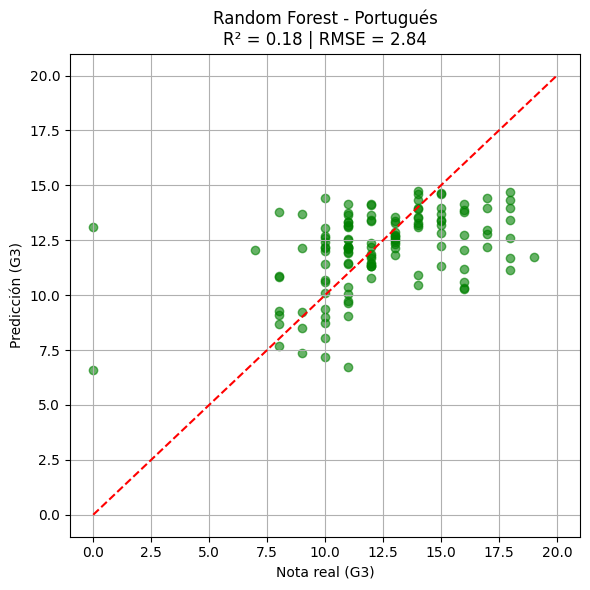

In [7]:
#6. Visualización — Random Forest

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color="green")
plt.plot([0,20], [0,20], color='red', linestyle='--')
plt.xlabel("Nota real (G3)")
plt.ylabel("Predicción (G3)")
plt.title(f"Random Forest - Portugués\nR² = {r2_rf:.2f} | RMSE = {rmse_rf:.2f}")
plt.grid(True)
plt.tight_layout()
plt.show()

Aquí los puntos están más cerca de la diagonal roja que con la regresión lineal → indica que predice mejor.

In [10]:
# 7. Comparativa final

print("🔎 Comparativa modelos (portugués, sin G1 ni G2):")
print(f"📈 Regresión Lineal:   R² = {r2_lr:.3f} | RMSE = {rmse_lr:.2f}")
print(f"🌲 Random Forest:      R² = {r2_rf:.3f} | RMSE = {rmse_rf:.2f}")

🔎 Comparativa modelos (portugués, sin G1 ni G2):
📈 Regresión Lineal:   R² = 0.160 | RMSE = 2.86
🌲 Random Forest:      R² = 0.176 | RMSE = 2.84


| Modelo               | R²    | RMSE | Interpretación didáctica                                                                       |
| -------------------- | ----- | ---- | ---------------------------------------------------------------------------------------------- |
| **Regresión Lineal** | 0.160 | 2.86 | Explica un 16% de la variabilidad de la nota final. Se equivoca de media 2.86 puntos sobre 20. |
| **Random Forest**    | 0.176 | 2.84 | Ligeramente mejor. Explica un 17.6% de la nota final. Se equivoca de media 2.84 puntos.        |


🧠 ¿Qué significa esto?
🔹 Precisión baja
Ambos modelos predicen mejor que tirar un dado, pero no mucho.

Un R² de 0.16 o 0.17 significa que más del 80% de la variabilidad de las notas no se puede explicar con estas variables (sin G1/G2).

🔹 Error moderado
Un RMSE ≈ 2.8 quiere decir que el modelo se equivoca en torno a ±3 puntos sobre 20.

Si un alumno iba a sacar un 11, podría predecir un 8 o un 14, aproximadamente.

🎓 CONCLUSIÓN
Intentamos predecir la nota final de portugués (G3) sin utilizar las notas previas (G1, G2), empleando únicamente datos personales, escolares y familiares.
La regresión lineal explicó un 16% de la variabilidad del rendimiento final, y Random Forest subió a un 17.6%, con errores medios de unos 2.8 puntos.
Esto nos muestra que sin datos académicos previos, la predicción tiene un valor limitado, aunque capta ciertas tendencias.
Si se usaran G1 y G2, el modelo probablemente ganaría mucha más precisión, pero eso supondría tener ya parte de la información que intentamos anticipar.